In [2]:
# Step 1) ok
# Import essential packages
import matplotlib.pyplot as plt # For plotting graph
import numpy as np # For matrix computation
import pandas as pd # For data handling
import math as mt # For mathematical computation

In [3]:
# Step 2) ok
# Load dataset in Python
df_t1 = pd.read_csv('ds1_train.csv')
df_v1 = pd.read_csv('ds1_valid.csv')
n_t1 = len(df_t1)
n_v1 = len(df_v1)

#Visualizing df
print("df_t1 has rows", n_t1)
print(df_t1.head(20))
print("---------------------------------------------------------------------------------")
print("df_v1 has rows", n_v1)
print(df_v1.head(20))
print("---------------------------------------------------------------------------------")

df_t1 has rows 800
         x_1         x_2    y
0   2.911809   60.359613  0.0
1   3.774746  344.149284  0.0
2   2.615488  178.222087  0.0
3   2.013694   15.259472  0.0
4   2.757625   66.194174  0.0
5   0.973922   41.677665  0.0
6   3.067275  143.275590  0.0
7   2.763094   35.969906  0.0
8   2.775772   29.569079  0.0
9   2.109830   76.636721  0.0
10  3.006263  107.382963  0.0
11  4.415775  148.957882  0.0
12  2.314335   79.246925  0.0
13  2.888480   63.011090  0.0
14  1.539774   19.775678  0.0
15  1.798540   84.141729  0.0
16  2.702089   55.745182  0.0
17  3.555458  142.499505  0.0
18  2.553712   48.233398  0.0
19  2.470141   24.362721  0.0
---------------------------------------------------------------------------------
df_v1 has rows 100
         x_1          x_2    y
0   2.177396    78.630076  0.0
1   3.952131   123.541573  0.0
2   3.351176    47.752517  0.0
3   2.074934    26.997730  0.0
4   3.579775   226.703779  0.0
5   2.568395   196.931982  0.0
6   6.362292  1419.049105  0.0
7 

In [4]:
# Play with the dataset
print(df_v1["y"].sum())

50.0


In [5]:
# Step 3) Data processing - Normalization: ok
df_t1['x_1'] = (df_t1['x_1']-np.mean(df_t1['x_1']))/np.std(df_t1['x_1'])
df_t1['x_2'] = (df_t1['x_2']-np.mean(df_t1['x_2']))/np.std(df_t1['x_2'])
df_v1['x_1'] = (df_v1['x_1']-np.mean(df_v1['x_1']))/np.std(df_v1['x_1'])
df_v1['x_2'] = (df_v1['x_2']-np.mean(df_v1['x_2']))/np.std(df_v1['x_2'])

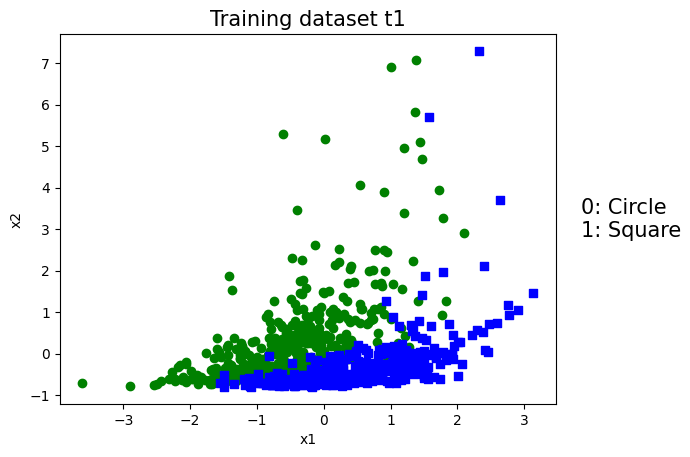

In [6]:
# Step 4.1) Visualize t1 ok
x1 = df_t1['x_1']
x2 = df_t1['x_2']
y = df_t1['y']

# Define custom colors/marker for each y
color_map = {0: 'green', 1: 'blue'}
marker_map = {0: 'o', 1:  's'}

# Create a list of colors/marker based on the y(s)
colors = [color_map[i] for i in y]
markers = [marker_map[i] for i in y]

# Create a 2D scatter plot with custom colors
for color, marker, x1_val, x2_val in zip(colors, markers, x1, x2):
    plt.scatter(x1_val, x2_val, c=color, marker=marker)

# Add comment indicating colors
plt.text(1.05, 0.5, '0: Circle\n1: Square', transform=plt.gca().transAxes, fontsize=15, va='center')
    
# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset t1', fontsize=15)

# Show the plot
plt.show()

In [7]:
# Step 5) Construct essential functions
# 1) exponential limit function ok
def exp_limit(x):
    return mt.exp(min(x, 500.0))

In [8]:
# Play with exp limit function
print(exp_limit(2.7))
print(exp_limit(499))

14.879731724872837
5.1635272073628715e+216


In [9]:
# 2) Sigmoid function ok
def sig(x):
    return 1/(1+exp_limit(-x))

In [10]:
# Play with sigmoid function
print(sig(200))

1.0


In [11]:
# 3) Loss function for logictic regression ok
def J(w): # J is convex
    func = 0
    for i in range(n_t1):
        label = df_t1.iloc[i,2]
        extended_dp = np.array([1, df_t1.iloc[i,0], df_t1.iloc[i,1]])
        sigv = sig(np.dot(extended_dp, w))
        func += label * mt.log(sigv + 1e-200) + (1 - label) * mt.log(1.0 - sigv + 1e-200)
    return -func/n_t1

In [12]:
# Play with the loss function
print(J([11, 12, 13]))

26.226491056631488


In [13]:
# Play with the dataset 
print(df_t1.head(2))
print(df_t1.iloc[0, 1]) # iloc refers to integer location
print(df_t1.iloc[0, 0])
print(df_t1.iloc[1, 1])
print(df_t1.iloc[1, 2])
print(df_t1.iloc[0])

        x_1       x_2    y
0 -0.541050 -0.284683  0.0
1  0.231929  2.209716  0.0
-0.2846832667111194
-0.5410499776111839
2.2097161451253347
0.0
x_1   -0.541050
x_2   -0.284683
y      0.000000
Name: 0, dtype: float64


In [14]:
# 4) Gradient of the loss function ok
def gra(w):
    grad = 0
    for i in range(n_t1):
        label = df_t1.iloc[i,2]
        extended_dp = np.array([1, df_t1.iloc[i,0], df_t1.iloc[i,1]])
        grad += extended_dp * (label - sig(np.dot(w, extended_dp)))
    return -grad/n_t1

In [15]:
# Play with the grad ok
print(gra([11,12,13]))
x = np.array([[1,2,3]])
print(np.transpose(x) @ x)

[0.19774233 0.07299611 0.31527484]
[[1 2 3]
 [2 4 6]
 [3 6 9]]


In [16]:
# 5) Hessian of the loss function
def hessian(w):
    h = 0
    for i in range(n_t1):
        extended_dp1 = np.array([1, df_t1.iloc[i,0], df_t1.iloc[i,1]])
        extended_dp2 = np.array([[1, df_t1.iloc[i,0], df_t1.iloc[i,1]]])
        sigv = sig(np.dot(extended_dp1, w))
        h += sigv * (1 - sigv) * (np.transpose(extended_dp2) @ extended_dp2)
    return h/n_t1 + 1e-10

In [17]:
# Play with the hessian
inv_hess = np.linalg.inv(hessian([1,2,3]))
print(np.dot(inv_hess, gra([1,2,3])))

[ 9.21554178  5.41085972 27.09429519]


In [18]:
# Step 6) Initialize w ok
w = np.zeros(3)
print(w)

[0. 0. 0.]


In [19]:
# Step 7) Train logistic regression 
store_obj = []
step_size = 0.5
train_iter = 20
for i in range(train_iter):
    store_obj.append(J(w))
    inv_hessian = np.linalg.inv(hessian(w))
    w -= step_size * np.dot(inv_hessian, gra(w))

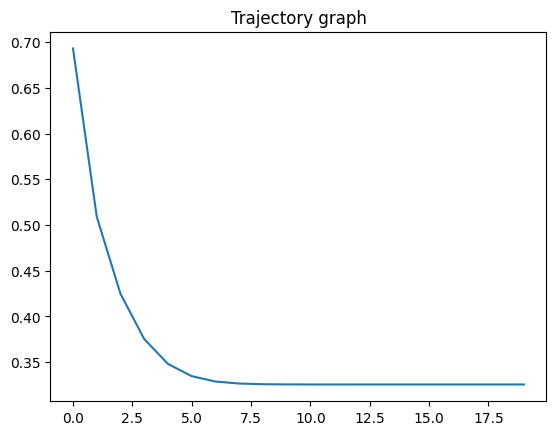

In [20]:
# Step 8) Plot trajectory
plt.plot(list(range(train_iter)), store_obj)
plt.title("Trajectory graph")
plt.show()

In [21]:
# Step 9) Output w
print(w)

[-0.32555458  2.76532002 -3.40311938]


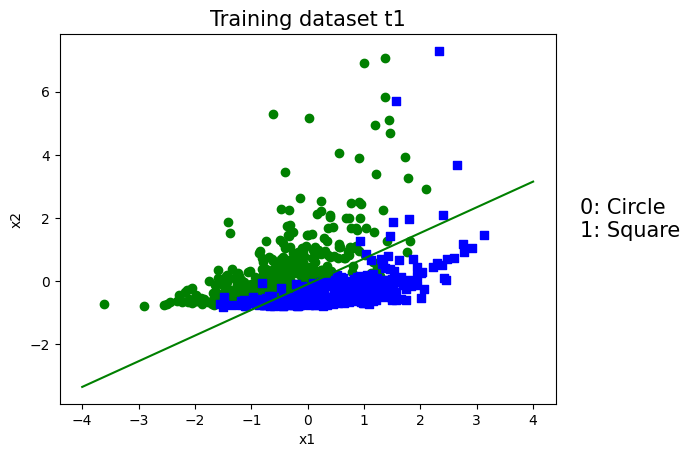

In [22]:
# Step 10) Plot w on the training dataset
# Visualize t1 ok
x1 = df_t1['x_1']
x2 = df_t1['x_2']
y = df_t1['y']

# Define custom colors/marker for each y
color_map = {0: 'g', 1: 'b'}
marker_map = {0: 'o', 1:  's'}

# Create a list of colors/marker based on the y(s)
colors = [color_map[i] for i in y]
markers = [marker_map[i] for i in y]

# Create a 2D scatter plot with custom colors
for color, marker, x1_val, x2_val in zip(colors, markers, x1, x2):
    plt.scatter(x1_val, x2_val, c=color, marker=marker)

# Add the regression line
x = np.linspace(-4, 4, 100)  # Generate x-values
y = (-w[0] - w[1] * x) / w[2]  # Compute corresponding y-values for the line
plt.plot(x, y, color='g')

# Add comment indicating colors
plt.text(1.05, 0.5, '0: Circle\n1: Square', transform=plt.gca().transAxes, fontsize=15, va='center')
    
# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset t1', fontsize=15)

# Show the plot
plt.show()

In [23]:
# Step 11) Error function
def err_train(w):
    error = 0
    for i in range(n_t1):
        dotv = np.dot(w, np.array([1, df_t1.iloc[i, 0], df_t1.iloc[i, 1]]))
        if (sig(dotv)>=0.5 and df_t1.iloc[i, 2] == 0) or (sig(dotv)<0.5 and df_t1.iloc[i, 2] == 1):
            error += 1
        else:
            continue
    return error/n_t1

def err_valid(w):
    error = 0
    for i in range(n_v1):
        dotv = np.dot(w, np.array([1, df_v1.iloc[i, 0], df_v1.iloc[i, 1]]))
        if (sig(dotv)>=0.5 and df_v1.iloc[i, 2] == 0) or (sig(dotv)<0.5 and df_v1.iloc[i, 2] == 1):
            error += 1
        else:
            continue
    return error/n_v1

In [24]:
# Step 12) Evaluate error 
# a) Train error
print(err_train(w))
# b) Test error
print(err_valid(w))

0.1175
0.16


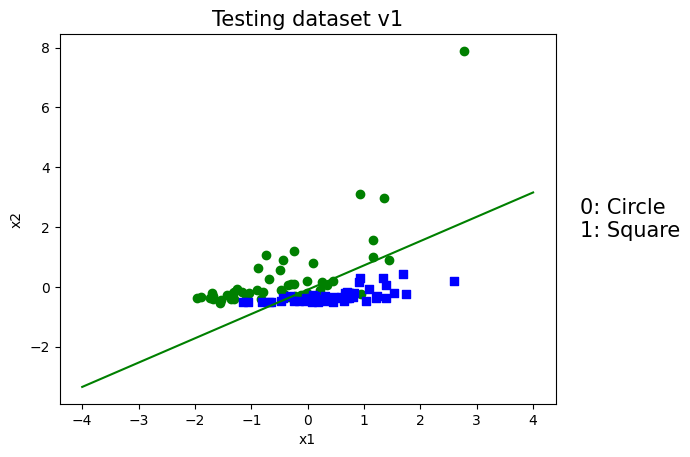

In [25]:
# Step 13) Plot w on the testing dataset
# Visualize t1 ok
x1 = df_v1['x_1']
x2 = df_v1['x_2']
y = df_v1['y']

# Define custom colors/marker for each y
color_map = {0: 'g', 1: 'b'}
marker_map = {0: 'o', 1:  's'}

# Create a list of colors/marker based on the y(s)
colors = [color_map[i] for i in y]
markers = [marker_map[i] for i in y]

# Create a 2D scatter plot with custom colors
for color, marker, x1_val, x2_val in zip(colors, markers, x1, x2):
    plt.scatter(x1_val, x2_val, c=color, marker=marker)

# Add the regression line
x = np.linspace(-4, 4, 100)  # Generate x-values
y = (-w[0] - w[1] * x) / w[2]  # Compute corresponding y-values for the line
plt.plot(x, y, color='g')

# Add comment indicating colors
plt.text(1.05, 0.5, '0: Circle\n1: Square', transform=plt.gca().transAxes, fontsize=15, va='center')
    
# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Testing dataset v1', fontsize=15)

# Show the plot
plt.show()